In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv("NMG_spei_prec_evapomédia.csv",sep=';')

df['Evapotranspiração média 1961-2020'] =  df['Evapotranspiração média 1961-2020'].str.replace(',', '.').astype(float)
df['Precipitação média 1961-2020'] = df['Precipitação média 1961-2020'].str.replace(',', '.').astype(float)
df['spei média 1961-2020'] = df['spei média 1961-2020'].str.replace(',', '.').astype(float)
old_df = pd.read_csv("spei2019.csv",sep=';')
df.head()
# Criação dos três DataFrames
df_evapotranspiracao = df[['NM_MUNICIP', 'Evapotranspiração média 1961-2020']]
df_precipitacao = df[['NM_MUNICIP', 'Precipitação média 1961-2020']]
df_spei = df[['NM_MUNICIP', 'spei média 1961-2020']]
chosendf = df_evapotranspiracao
chosencolumn = chosendf.columns[1]
chosendf


,NM_MUNICIP,Evapotranspiração média 1961-2020
0,LASSANCE,1412.868997
1,PORTEIRINHA,1584.240031
2,MIRAVÂNIA,1617.037012
3,BERIZAL,1408.439990
4,MANGA,1677.429552
...,...,...
92,GLAUCILÂNDIA,1442.275024
93,JAPONVAR,1515.345947
94,MONTEZUMA,1568.102527
95,NINHEIRA,1429.509717


In [3]:
df.shape # numero de linhas e colunas

(97, 4)

In [4]:
df.describe()

,Evapotranspiração média 1961-2020,Precipitação média 1961-2020,spei média 1961-2020
count,97.000000,97.000000,97.000000
mean,1505.308613,920.344740,0.074439
std,92.997109,120.373683,0.078016
min,1350.934180,724.941882,-0.206253
25%,1426.398876,799.266113,0.037326
50%,1500.437057,920.412146,0.079863
75%,1568.102527,1024.276993,0.137045
max,1704.417306,1180.447926,0.241153


,NM_MUNICIP,Evapotranspiração média 1961-2020
9,ESPINOSA,1704.417306
71,MATIAS CARDOSO,1691.762154
87,GAMELEIRAS,1691.192368
19,JUVENÍLIA,1684.595302
4,MANGA,1677.429552
...,...,...
18,JOSÉ GONÇALVES DE MINAS,1375.282400
77,ITACAMBIRA,1367.169417
15,BOTUMIRIM,1362.757656
33,AUGUSTO DE LIMA,1353.636963


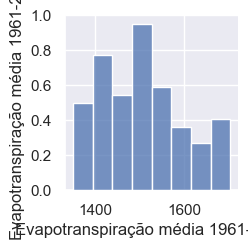

In [5]:

sns.pairplot(chosendf) # FAZ UM HISTOGRAMA COM OS DADOS

chosendf.sort_values(by=chosencolumn,ascending=False)


In [6]:
df_new = chosendf.iloc[:, [1]] # SEPARO A SEGUNDA COLUNA (COM OS VALORES NUMÉRICOS)

df_new

,Evapotranspiração média 1961-2020
0,1412.868997
1,1584.240031
2,1617.037012
3,1408.439990
4,1677.429552
...,...
92,1442.275024
93,1515.345947
94,1568.102527
95,1429.509717


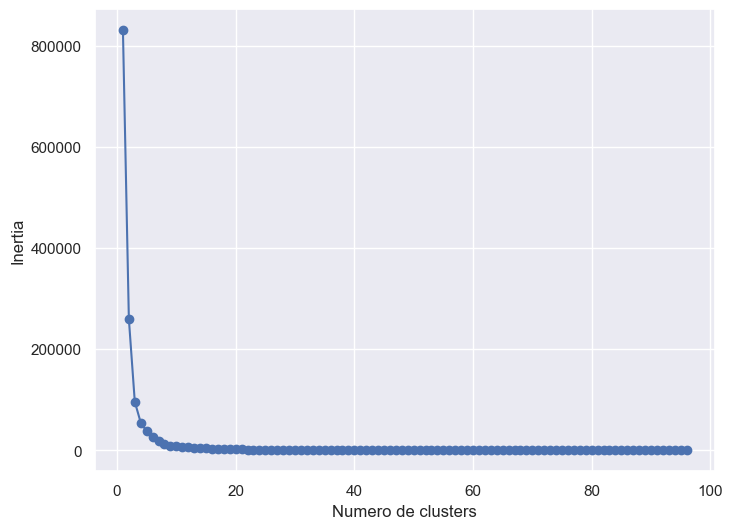

In [7]:
inertias = []
tamanho_df = df_new.shape
for k in np.arange(1, tamanho_df[0]):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_new)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1,tamanho_df[0]), inertias, '-o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia');

In [8]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
df_new['cluster'] = kmeans.fit_predict(df_new)
df_new

,Evapotranspiração média 1961-2020,cluster
0,1412.868997,4
1,1584.240031,0
2,1617.037012,0
3,1408.439990,4
4,1677.429552,3
...,...,...
92,1442.275024,1
93,1515.345947,2
94,1568.102527,0
95,1429.509717,1


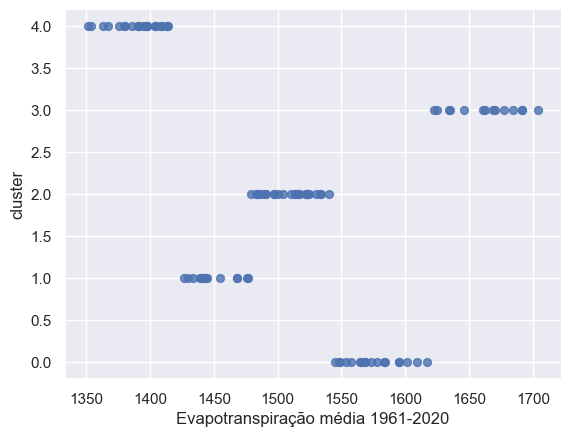

In [9]:
from matplotlib import pyplot as plt
df_new.plot(kind='scatter', x=chosencolumn, y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Realizar o merge
merged_df = pd.merge(df_new, chosendf, on=chosencolumn, how='inner')


merged_df

,Evapotranspiração média 1961-2020,cluster,NM_MUNICIP
0,1412.868997,4,LASSANCE
1,1584.240031,0,PORTEIRINHA
2,1617.037012,0,MIRAVÂNIA
3,1408.439990,4,BERIZAL
4,1677.429552,3,MANGA
...,...,...,...
92,1442.275024,1,GLAUCILÂNDIA
93,1515.345947,2,JAPONVAR
94,1568.102527,0,MONTEZUMA
95,1429.509717,1,NINHEIRA


In [11]:

import geopandas as gpd


gdf_mg = gpd.read_file('geojs-31-mun.json')
# Transformar a coluna 'name' para maiúsculo
gdf_mg['name'] = gdf_mg['name'].str.upper()
gdf_mg

,id,name,description,geometry
0,3100104,ABADIA DOS DOURADOS,Abadia dos Dourados,"POLYGON ((-47.44410 -18.15847, -47.43543 -18.1..."
1,3100203,ABAETÉ,Abaeté,"POLYGON ((-45.18200 -18.88757, -45.17314 -18.8..."
2,3100302,ABRE CAMPO,Abre Campo,"POLYGON ((-42.36955 -20.13218, -42.35755 -20.1..."
3,3100401,ACAIACA,Acaiaca,"POLYGON ((-43.11391 -20.35784, -43.10969 -20.3..."
4,3100500,AÇUCENA,Açucena,"POLYGON ((-42.38592 -18.92388, -42.38140 -18.9..."
...,...,...,...,...
848,3171808,VIRGINÓPOLIS,Virginópolis,"POLYGON ((-42.70675 -18.66017, -42.68531 -18.6..."
849,3171907,VIRGOLÂNDIA,Virgolândia,"POLYGON ((-42.32194 -18.35613, -42.32256 -18.3..."
850,3172004,VISCONDE DO RIO BRANCO,Visconde do Rio Branco,"POLYGON ((-42.88457 -20.93903, -42.88098 -20.9..."
851,3172103,VOLTA GRANDE,Volta Grande,"POLYGON ((-42.53029 -21.69567, -42.52692 -21.7..."


In [ ]:
# Mesclar o DataFrame com informações das cidades com o GeoDataFrame
gdf_mg = gdf_mg.rename(columns={'name': chosendf.columns[0]})
gdf = pd.merge(gdf_mg, merged_df, on=chosendf.columns[0], how='inner')


#Alerta de gambiarra kk
#Estou usando a coluna "cluster" pra plotar as cidades limitrofes no mapa  
# daki pra baixo não tem mais nada a ver com o agrupamento e o Kmeans acima

gdf['cluster'] = 0
# Lista de cidades para atualizar
cidades_para_atualizar = [
    'CAPITÃO ENÉAS',
    'IBIRACATU',
    'JANAÚBA',
    'JAPONVAR',
    'LONTRA',
    'MONTES CLAROS',
    'PATIS',
    'VARZELÂNDIA',
    'VERDELÂNDIA'
]

cidadesPrincipais = {
  'SÃO JOÃO DA PONTE'
}

# Atualizar os nomes das cidades para uppercase e definir o cluster como 1

gdf['cluster'] = gdf.apply(lambda row: 1 if row['NM_MUNICIP'] in cidades_para_atualizar else row['cluster'], axis=1)
gdf['cluster'] = gdf.apply(lambda row: 2 if row['NM_MUNICIP'] in cidadesPrincipais else row['cluster'], axis=1)
gdf

,id,NM_MUNICIP,description,geometry,Evapotranspiração média 1961-2020,cluster
0,3101003,ÁGUAS VERMELHAS,Águas Vermelhas,"POLYGON ((-41.40276 -15.48281, -41.39456 -15.4...",1404.125081,0
1,3102704,CACHOEIRA DE PAJEÚ,Cachoeira de Pajeú,"POLYGON ((-41.40567 -15.84047, -41.38368 -15.8...",1379.723999,0
2,3104809,AUGUSTO DE LIMA,Augusto de Lima,"POLYGON ((-44.04087 -17.97406, -43.98015 -17.9...",1353.636963,0
3,3106507,BERILO,Berilo,"POLYGON ((-42.49268 -16.73211, -42.49537 -16.7...",1390.440865,0
4,3106655,BERIZAL,Berizal,"POLYGON ((-41.73589 -15.59733, -41.71296 -15.6...",1408.439990,0
...,...,...,...,...,...,...
92,3170529,URUCUIA,Urucuia,"POLYGON ((-45.57956 -15.72591, -45.55537 -15.7...",1522.150703,0
93,3170651,VARGEM GRANDE DO RIO PARDO,Vargem Grande do Rio Pardo,"POLYGON ((-42.23223 -15.19171, -42.22579 -15.2...",1513.228540,0
94,3170800,VÁRZEA DA PALMA,Várzea da Palma,"POLYGON ((-44.80564 -17.05160, -44.79387 -17.0...",1490.523521,0
95,3170909,VARZELÂNDIA,Varzelândia,"POLYGON ((-44.00901 -15.48799, -44.00785 -15.4...",1578.013468,1


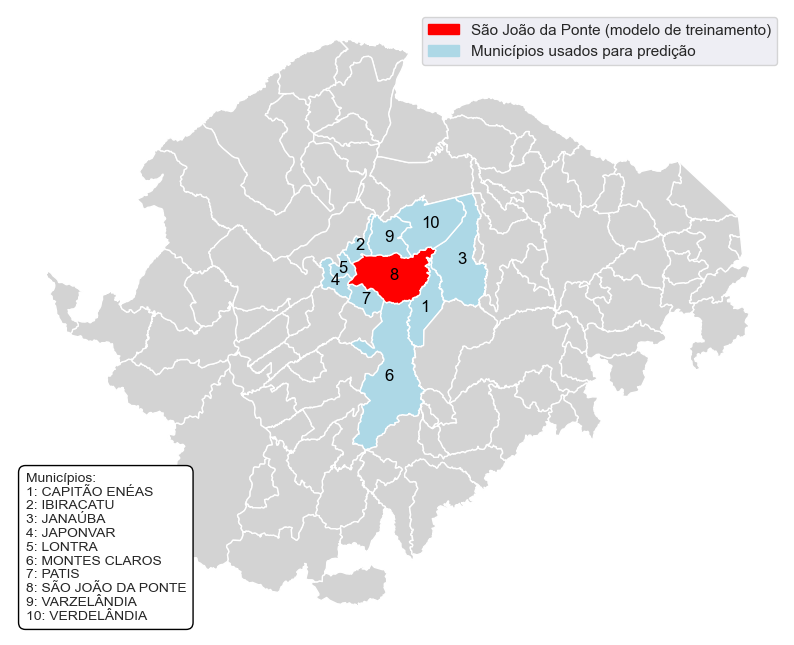

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Criar um dicionário de cores para cada valor de cluster
cluster_colors = {
    0: 'lightgrey',
    1: 'lightblue',
    2: 'red',
  
}

# Criar uma coluna de cores baseada no valor de cluster
gdf['color'] = gdf['cluster'].map(cluster_colors)

gdf.plot(ax=ax, color=gdf['color'], legend=True, legend_kwds={'label': "Grupos"})
# Criar patches para a legenda
cidade_principal_patch = mpatches.Patch(color='red', label='São João da Ponte (modelo de treinamento)')
cidade_predicao_patch = mpatches.Patch(color='lightblue', label='Municípios usados para predição')

# Adicionar a legenda ao gráfico
ax.legend(handles=[cidade_principal_patch, cidade_predicao_patch], loc='upper right')

# Adicionar números e criar a legenda com o nome de cada município
count = 0
dictMun = {}
for idx, row in gdf.iterrows():
    if row['color'] in cluster_colors.values() and row['color'] != 'lightgrey':  # Verificar se o município está colorido e não é lightgrey
        
        # Adiciona um número no centroide de cada município
        ax.annotate(
            text=str(count + 1),  # Número do município (ajustado para começar em 1)
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha='center', va='center', color='black'
        )
        dictMun[count] = row['NM_MUNICIP']
        count+=1

# Criar uma string com todos os nomes dos municípios numerados e adicionar um título
legenda_texto = "Municípios:\n" + "\n".join([f"{count + 1}: {city}" for count, city in dictMun.items()])

# Adicionar a legenda dos municípios em uma única caixa no canto inferior esquerdo
ax.text(
    x=0.02, y=0.02,  # Posição da legenda no canto inferior esquerdo
    s=legenda_texto,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='bottom',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Caixa ao redor do texto
)
# Remove os eixos x e y
ax.set_axis_off()
plt.show()